# Social Network Ads - Classification Model Creation

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [9]:

# Load dataset
df = pd.read_csv("/content/Social_Network_Ads (1).csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:

# Encode Gender column if present
if "Gender" in df.columns:
    le = LabelEncoder()
    df["Gender"] = le.fit_transform(df["Gender"])

# Features and Target
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

def evaluate_classification(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}


In [12]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

results = {}

for name, model in models.items():
    print(f"===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = evaluate_classification(y_test, y_pred)
    results[name] = metrics
    print("\n")


===== Logistic Regression =====
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

Confusion Matrix:
 [[50  2]
 [ 7 21]]


===== Decision Tree =====
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        52
           1       0.88      0.79      0.83        28

    accuracy                           0.89        80
   macro avg       0.89      0.86      0.87        80
weighted avg       0.89      0.89      0.89        80

Confusion Matrix:
 [[49  3]
 [ 6 22]]


===== Random Forest =====
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
 

                     Accuracy  Precision  Recall        F1
Logistic Regression    0.8875   0.889741  0.8875  0.884566
Decision Tree          0.8875   0.887091  0.8875  0.885893
Random Forest          0.9250   0.931771  0.9250  0.926000
SVM                    0.9250   0.927333  0.9250  0.925558
KNN                    0.9125   0.912909  0.9125  0.911250
XGBoost                0.8500   0.850000  0.8500  0.850000


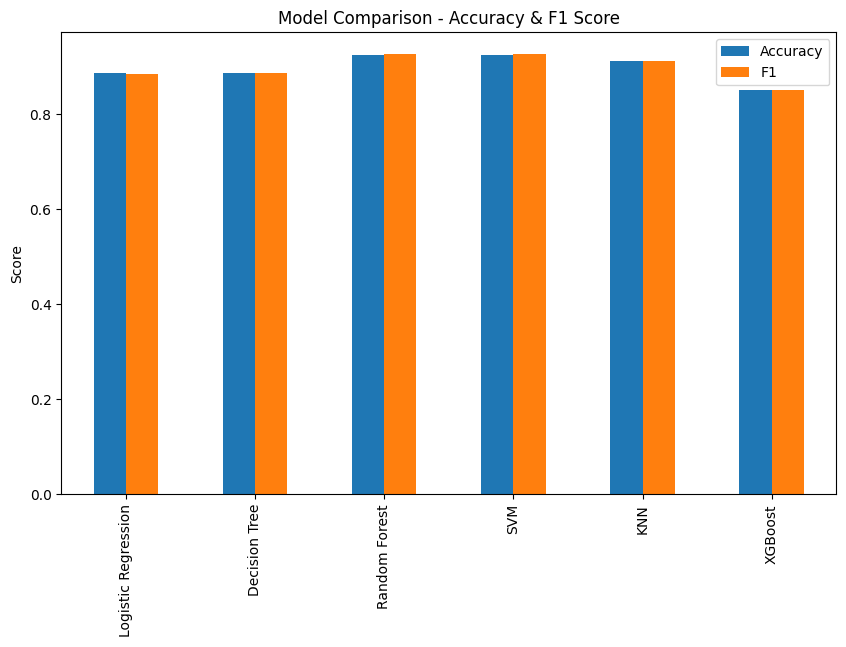

In [13]:

results_df = pd.DataFrame(results).T
print(results_df)

# Plot Accuracy and F1 comparison
results_df[["Accuracy", "F1"]].plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison - Accuracy & F1 Score")
plt.ylabel("Score")
plt.show()
